<table style="width: 100%; border-style: none">
<tr style="border-style: none; background-color: #82a8cf">
<td style="border-style: none; width: 1%; text-align: left; font-size: 16px; color: #ffffff">Institut f&uuml;r Theoretische Physik<br /> <font color="#e6e6e6">Universit&auml;t zu K&ouml;ln </font></td>
<td style="border-style: none; width: 1%; font-size: 16px">&nbsp;</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 16px; color: #ffffff">Prof. Dr. Simon Trebst<br /> <font color="#e6e6e6"> Theo Haas </font> </td>
</tr>
</table>
<hr>
<h1 style="font-weight:bold; text-align: center; margin: 10px; padding:0px;">Computerphysik</h1>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Übungsblatt 6</h1>
<hr>
<h3 style="font-weight:bold; text-align: center; margin: 0px; padding:0px; margin-bottom: 20px;">Sommersemester 2025</h3>

**Website:** <a href="https://www.thp.uni-koeln.de/trebst/Lectures/2025-CompPhys.shtml" style="color:#82a8cf; text-decoration: underline;text-decoration-style: dotted;">https://www.thp.uni-koeln.de/trebst/Lectures/2025-CompPhys.shtml</a>

**Abgabe:** <span style="color:#82a8cf"> 12.05.2025, 12:00 Uhr </span> <span style="float:right;">**Besprechung**: 14.05.2025 - 16.05.2025.</span>

**Name:** <span style="color:#82a8cf"> Bitte geben Sie Ihren Namen an.  </span>
<hr>

<hr style="height:.3px"> 

<span style="color:#606060; font-weight:bold; font-size:20px"> Aufgaben auf Übungsblatt 6</span>
- <span style="color:#606060; font-weight:light; font-size:14px"> Aufgabe 13: Simpson- vs. Trapezregel [10 Punkte] </span>
- <span style="color:#606060; font-weight:light; font-size:14px"> Aufgabe 14: Sortieren, Skalieren und Animieren [10 Punkte]</span>
- <span style="color:#82a8cf; font-weight:bold; font-size:16px"> Aufgabe 15 (Bonus): Stau aus dem Nichts [12 Bonus-Punkte] </span>
<hr style="height:.3px"> 

<table style="border-style: none; width: 100%; background-color: #FFFFFF"><tr style="border-style: none;">
<td style="border-style: none; width:1%; text-align: left; font-size: 25px; font-weight: 200;background-color: #FFFFFF">Aufgabe 15: Stau aus dem Nichts</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 15px;background-color: #FFFFFF">[12 Bonus-Punkte]</td></tr></table>

Wahrscheinlich hat jeder schon einmal das Phänomen des "Stau aus dem Nichts" selber miterlebt: Ohne einen offensichtlichen Grund, wie Überlastung oder Blockade von Straßen durch Baustellen oder Unfälle, formieren sich Staus, die sich ebenso überraschend wieder auflösen. Die erste Formulierung eines Modells, das einen solchen *Phantomstau* als Konsequenz von Trödeln und Überreaktionen beim Bremsen vorhersagt, gelang 1992, hier am Institut für Theoretische Physik der Universität zu Köln, mit dem sogenannten **Nagel-Schreckenberg-Modell**. Den Original-Artikel finden Sie [hier](https://web2.qatar.cmu.edu/~gdicaro/15382/additional/NagelSchr-model.pdf). Erweiterungen des Modells finden auch heute nach Anwendung in der Verkehrsvorhersage. 

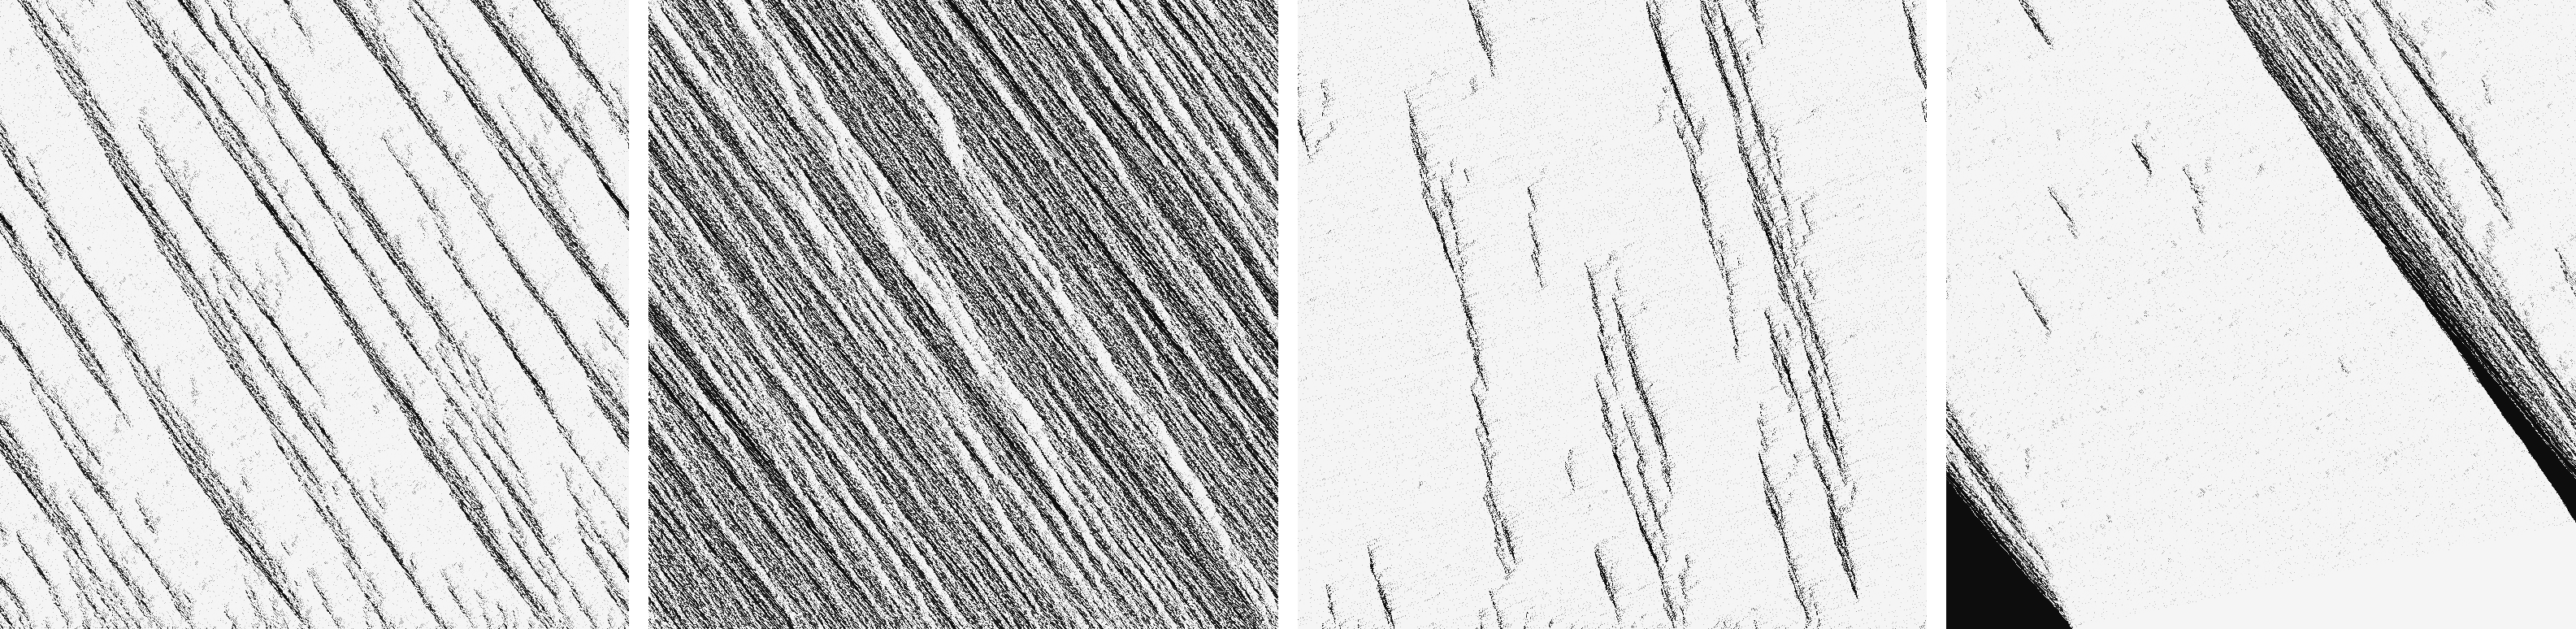

In dieser Aufgabe wollen wir das relativ simple "NaSch-Modell" verstehen und implementieren. Es basiert auf dem Konzept eines eindimensionalen *zellulären Automaten*. Die Zellen sind dabei Fahrbahnabschnitte, die entweder von einem Fahrzeug belegt sind oder nicht. Jedes Fahrzeug hat zusätzlich zu seiner Position einen weiteren Parameter, nämlich eine Geschwindigkeit. Der Einfachheit halber umfassen die möglichen Werte für die Geschwindigkeit nur die Zahlen 0,1,2,3,4,5.

Man kann für dieses Modell durchaus einen Bezug zur Realität herstellen, in dem man folgende Analogie verwendet:
* Länge einer Zelle $\equiv 7.5\,\text{m}$,
* Geschwindigkeit $i \equiv i · 27\, \text{km/h}$,
* Iterationsschritt $\equiv 1\,s$.

Der Iterationsschritt dieses zellulären Automaten besteht aus 4 Teilen:

1. **Beschleunigen**: Die Geschwindigkeiten aller Fahrzeuge werden um $1$ erhöht, solange die Höchstgeschwindigkeit $5$ noch nicht erreicht ist.

2. **Bremsen**: Bei allen Fahrzeugen, deren Abstand $d$ zum Vordermann kleiner oder gleich ihrer Geschwindigkeit ist (die also im nächsten Schritt crashen würden, wenn der Vordermann die Geschwindigkeit $0$ hätte), wird die Geschwindigkeit auf $d - 1$ reduziert (sodass ein Crash vermieden wird).

3. **Trödeln**: Jedes Fahrzeug (das nicht still steht) reduziert seine Geschwindigkeit mit Wahrscheinlichkeit $p$ um eine Einheit.

4. **Bewegung**: Jedes Fahrzeug wird um seine Geschwindigkeit nach vorne bewegt. Dabei interpretieren wir die Geschwindigkeit in Anzahl der vorgerückten Zellen pro Zeiteinheit.

Alle Fahrzeuge durchlaufen diesen Zyklus gleichzeitig, d.h. es werden für jedes Fahrzeug die Werte des vorherigen Zyklus verwendet und nicht die schon teilweise aktualisierten.

## a) Implementierung des Updates in Julia

Zur Implementierung des Nagel-Schreckenberg Modells wollen wir zuerst eine Funktion definieren, die das gesamte System um einen einzigen Zeitschritt iteriert. Die Idee ist, später diese Update-Funktion in einer `for`-Schleife zu benutzen. 

Sie sollen die nachfolgende Update-Funktion vervollständigen, welche den oben beschriebenen zellulären Automaten für eine Fahrbahn von `n_cells` Zellen mit *periodischen Randbedingungen* (wie eine Rennstrecke ohne Auf- und Abfahrt) um einen Zeitschritt iteriert. Der Funktion werden dabei die folgenden Parameter übergeben:
- `positions` Array mit den Positionen der Fahrzeuge (z.B. ist `positions[1]` die Position des ersten Fahrzeugs),
- `speeds` Array mit den Geschwindigkeiten der Fahrzeuge (z.B. ist `speeds[1]` die Geschwindigkeit des ersten Fahrzeugs),
- `n_cells` Länge der Fahrbahn,
- `p` Wahrscheinlichkeit des Trödelns in einem Schritt.

In der Funktion sollen die Einträge der Listen `positions` und `speeds` gemäß der obigen vier Schritte aktualisiert werden.

In [ ]:
function iterate_traffic!(positions, speeds, n_cells, p)
    
    #######################
    # HIER STEHT IHR CODE #
    #######################
    # 1. Beschleunigen
    # ...
    # 2. Bremsen
    # ...
    # 3. Trödeln
    # ...
    # 4. Bewegen
    # ...
    
    return nothing
end

## b) Darstellung des Verkehrssystems

Zusätzlich zu der Iterationsmethode wollen wir eine Funktion zur Darstellung der Zeitentwicklung implementieren. Diese Funktion soll für einen gegebenen Parametersatz aus Anfangsbedingungen `positions` und `speeds`, Länge der Fahrbahn `n_cells` sowie Trödelwahrscheinlichkeit `p` für eine gegebene Zeitspanne aus `n_times` Iterationsschritten, das System iterieren und das Ergebnis visualisieren.

Wir stellen Ihnen in der folgenden Zelle bereits eine Methode hierfür zur Verfügung.
Darin speichern wir die zeitentwickelte "Fahrbahn" in einer Matrix `img` ab, die aus `n_cells` Zeilen und `n_times` Spalten besteht. Jede Spalte entspricht also der Darstellung der Fahrbahn zu einem anderen Zeitpunkt.
In der Darstellung mit dem Befehl `heatmap` verläuft die Fahrbahn dann von links nach rechts und die Zeitachse von unten nach oben (ganz ähnlich der Darstellung von Weltlinien in der relativistischen Mechanik). 

Kommentieren Sie den Code der Julia-Funktion `make_traffic_plot` und erklären Sie, welche Abschnitte welche relevanten Funktionen erfüllen.

*Hinweis:* Wenn Sie die nachfolgenden Zellen ausführen, wird Ihnen zur besseren Veranschaulichung die Trajektorie von nur zwei (zuerst stehenden) Autos gezeigt.

In [ ]:
using CairoMakie
CairoMakie.activate!()

In [ ]:
function make_traffic_plot(positions, speeds, n_cells, p, n_times)
   
    img = -ones(n_cells, n_times)
    
    for t in 1:n_times
        for c in 1:length(positions)
            img[positions[c],t] = speeds[c]
        end
        iterate_traffic!(positions, speeds, n_cells, p)
    end
    
    fig = Figure()
    ax = Axis(fig[1,1])
    
    heatmap!(ax, img, colorrange = (0,5), lowclip =:grey96, colormap = :RdBu_4)
    
    hidedecorations!(ax)
    hidespines!(ax)
   
    fig
end

In [ ]:
make_traffic_plot([1, 50], [0,0], 100, 0, 50)

## c) Stau aus dem Nichts

Nachdem sowohl das Update des Modells als auch die Darstellung der Zeitentwicklung implementiert wurde, möchten wir nun den Verkehr auf einer "durchschnittlichen" Straße beschreiben.

Führen Sie dafür zunächst die nachfolgende Zelle aus.

In [ ]:
# PARAMETER
density = 0.2
p       = 0.15
n_cells = 1500
n_times = 1000

# Arrays initialisieren
positions = []
speeds    = []

# STARTBEDINGuNGEN
for i in 1:n_cells
    if rand()<density
        push!(positions, i)
        push!(speeds, rand([3,4,5]))
    end
end

# MAKE PLOT
make_traffic_plot(positions, speeds, n_cells, p, n_times)

Erklären Sie jetzt folgende Punkte in einem kurzen Kommentar:
- Wie wurden die Anfangsbedingungen für den Verkehr gewählt und wie wurden Sie implementiert?
- Wie verhält sich das System in der Zeit?

## d) Weitere Szenarien

Basierend auf der Lösung aus c) sollen Sie nun weitere Startbedingungen implementieren. Benutzen Sie für jeden der folgenden Fälle eine eigene Zelle des Notebooks und beschreiben Sie qualitativ den Verkehrsfluss.
1. Überfüllung – `p=0.0`, `density=0.5`,
2. Sonntagsfahrer – `p=0.5`, `density=0.1`,
3. Ampelstart – Stellen Sie alle Fahrzeuge zu Beginn direkt hintereinander auf und wählen Sie `p=0.15`, `density=0.1`. 

## e) Optional: Animation mit Makie

Anstelle der Darstellung der Zeit als zweite Achse soll die Entwicklung des Verkehrs jetzt als Animation veranschaulicht werden. Dazu müssen Sie nur die Visualisierung anpassen, die Funktion `iterate_traffic` bleibt unverändert. Wie Sie bereits gelernt haben, sind Animationen und Interaktivität in Makie eng mit dem Konzept einer Observablen verbunden. Ergänzen Sie die untenstehende Funktion `update_obs!`, sodass die Funktion die durch die Übergabeparameter `positions` und `speed` festgelegte Verkehrssituation einmal aktualisiert und in die Observable `O` ein Array mit `n_cell` Einträgen schreibt. An den  Positionen, an denen sich ein Auto befindet, steht in dem Array die Geschwindigkeit des entsprechenden Autos. Befindet sich kein Auto in einer Zelle, dann soll der Eintrag des Arrays den Wert $-1$ haben (der Wert der Observablen entspricht also den Spalten in der obigen Visualisierung). 

Visualisieren Sie anschließend die Verkehrsentwicklung, in dem Sie mittels `heatmap` eine Observable darstellen, deren Wert die Anfangskonfiguration speichert und anschließend den Wert der Observablen mit der Funktion `update_obs!` wiederholt aktualisieren.

*Hinweis:* Um ein eindimensionales Array mittels `heatmap` darstellen zu können, können Sie dieses als Matrix mit einer Spalte implementieren. Vergleichen Sie etwa `heatmap(rand(100))` mit `heatmap(rand(100,1))`.

In [ ]:
function update_obs!(O::Observable, positions, speeds, n_cells)
    
    #######################
    # HIER STEHT IHR CODE #
    #######################
   
end